In [1]:
cd /sfs/fs1/work-geomar1/smomw184/ANA/ORCA025.L46/coarse_graining/fig2_KE

/sfs/fs1/work-geomar1/smomw184/ANA/ORCA025.L46/coarse_graining/fig2_KE


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from netCDF4 import Dataset
from haversine import haversine
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from cmocean import cm
from matplotlib import ticker

def cmap_discretize(cmap, n_colors):
    """Return a discrete colormap from the continuous colormap cmap.

    Parameters
    ----------
    cmap : str or colormap object
        Colormap to discretize.
    n_colors : int
        Number of discrete colors to divide `cmap` into.

    Returns
    ----------
    discrete_cmap : LinearSegmentedColormap
        Discretized colormap.
    """
    from matplotlib.colors import LinearSegmentedColormap
    import matplotlib.pyplot as plt

    if type(cmap) == basestring:
        cmap = plt.get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., n_colors), (0., 0., 0., 0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., n_colors + 1)
    cdict = {}
    for ki, key in enumerate(('red', 'green', 'blue')):
        cdict[key] = [(indices[i], colors_rgba[i - 1, ki], colors_rgba[i, ki])
                      for i in range(n_colors + 1)]
    # Return colormap object.
    return LinearSegmentedColormap(cmap.name + "_%d" % n_colors, cdict, 1024)

thermal_dis=cmap_discretize(cm.thermal,10)

def neg_sqrt(data):
    sign=data.copy()*0+1
    sign[data<0]=-1
    sqrt=np.sqrt(data*sign)
    return sqrt*sign

def running_mean_1d(x, N):
    '''Running mean along 1st dimension'''
    out=x.copy()*np.nan
    assert N!=0
    cumsum = np.cumsum(x,0)
    out[int(np.ceil(N/2.)):-int(np.floor(N/2.))]=(cumsum[N:,] - cumsum[:-N,]) / N 
    return out

/gpfs/fs6/home-geomar/smomw122/TM/software/miniconda3_20180110/envs/py2_std/lib/python2.7/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [3]:
ORCA025_ocean_data  =Dataset('/sfs/fs1/work-geomar1/smomw184/MASK025/mask.nc')
ORCA025_ocean=ORCA025_ocean_data.variables['tmaskutil'][:,:,:].squeeze()
e1t=ORCA025_ocean_data.variables['e1t'][:,:,:].squeeze()
e2t=ORCA025_ocean_data.variables['e2t'][:,:,:].squeeze()
e3t=ORCA025_ocean_data.variables['e3t'][:,:,:].squeeze()
# e3t=ORCA025_ocean_data.variables['e3t_0'][:].squeeze()
e3t_100m = e3t[0:10,600,600]

In [4]:
CTRL_t_data=Dataset('1440_720_ORCA025.L46-KRA031_5d_19580101_20041231_KE_surf_1y.nc')
CG_t_data=Dataset('1440_720_ORCA025.L46-KRA032_5d_19580101_20041231_KE_surf_1y.nc')

CTRL_eke = CTRL_t_data.variables['voeke'][:,0:10,:,:]*10000 #cm^2/s^2
CG_eke   = CG_t_data.variables['voeke'][:,0:10,:,:]*10000 #cm^2/s^2

CTRL_mke = CTRL_t_data.variables['vomke'][:,0:10,:,:]*10000 #cm^2/s^2
CG_mke   = CG_t_data.variables['vomke'][:,0:10,:,:]*10000 #cm^2/s^2

lon_in=CTRL_t_data.variables['lon'][:]
lat_in=CTRL_t_data.variables['lat'][:]
lon,lat = np.meshgrid(lon_in,lat_in)

In [5]:
CTRL_t_data=Dataset('ORCA025.L46-KRA031_5d_19580101_20041231_KE_surf_1y.nc')
CG_t_data=Dataset('ORCA025.L46-KRA032_5d_19580101_20041231_KE_surf_1y.nc')

ORCA025_CTRL_eke = CTRL_t_data.variables['voeke'][:,0:10,:,:].squeeze()*10000 #cm^2/s^2
ORCA025_CG_eke   = CG_t_data.variables['voeke'][:,0:10,:,:].squeeze()*10000 #cm^2/s^2
ORCA025_CTRL_mke = CTRL_t_data.variables['vomke'][:,0:10,:,:].squeeze()*10000 #cm^2/s^2
ORCA025_CG_mke   = CG_t_data.variables['vomke'][:,0:10,:,:].squeeze()*10000 #cm^2/s^2

nav_lat=CTRL_t_data.variables['nav_lat'][:]
nav_lon=CTRL_t_data.variables['nav_lon'][:]

In [6]:
def plot_func(var,contour_val,colormap,extend):
    x1=1
    x2=1441
    y1=100
    y2=800
    cs= m.contourf(lon[y1:y2,x1:x2],lat[y1:y2,x1:x2],var[y1:y2,x1:x2],contour_val,cmap=colormap,extend=extend,latlon=True) #,cmap=co.cm.thermal
    m.drawcoastlines(linewidth=0.5)
    m.fillcontinents()
    m.drawparallels(np.arange(-60,90,30),labels=[1,0,1,0],linewidth=0.5)
    m.drawmeridians(np.arange(0,420,60),labels=[0,0,0,0],linewidth=0.5)
    return(cs)

In [7]:
# first 100m depth mean
CTRL_eke_100m = np.nansum(CTRL_eke * e3t_100m[None,:,None,None],1)/np.nansum(e3t)

In [8]:
CTRL_eke_100m = np.nansum(CTRL_eke * e3t_100m[None,:,None,None],1)/np.nansum(e3t_100m)
CTRL_mke_100m = np.nansum(CTRL_mke * e3t_100m[None,:,None,None],1)/np.nansum(e3t_100m)
CG_eke_100m   = np.nansum(CG_eke * e3t_100m[None,:,None,None],1)/np.nansum(e3t_100m)
CG_mke_100m   = np.nansum(CG_mke * e3t_100m[None,:,None,None],1)/np.nansum(e3t_100m)

In [10]:
CTRL_eke_100m_tmean = np.nanmean(CTRL_eke_100m,0)
CTRL_mke_100m_tmean = np.nanmean(CTRL_eke_100m,0)
CG_eke_100m_tmean   = np.nanmean(CG_eke_100m,0)
CG_mke_100m_tmean   = np.nanmean(CG_mke_100m,0)

Text(0.5,1,u'MKE')

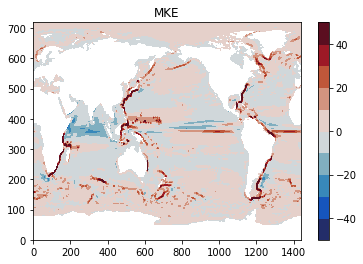

In [11]:
levs= np.arange(-50,60,10)
plt.contourf(np.sqrt(2*(CG_mke_100m_tmean))-np.sqrt(2*(CTRL_mke_100m_tmean)),levs,cmap=cm.balance)
plt.colorbar()
plt.title('MKE')

Text(0.5,1,u'EKE')

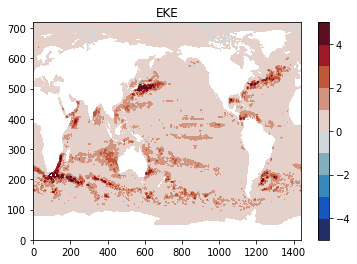

In [12]:
plt.contourf(np.sqrt(2*(CG_eke_100m_tmean))-np.sqrt(2*(CTRL_eke_100m_tmean)),levs*0.1,cmap=cm.balance)
plt.colorbar()
plt.title('EKE')

In [24]:
cd /sfs/fs1/work-geomar1/smomw184/ANA/DISPUTATION

/sfs/fs1/work-geomar1/smomw184/ANA/DISPUTATION


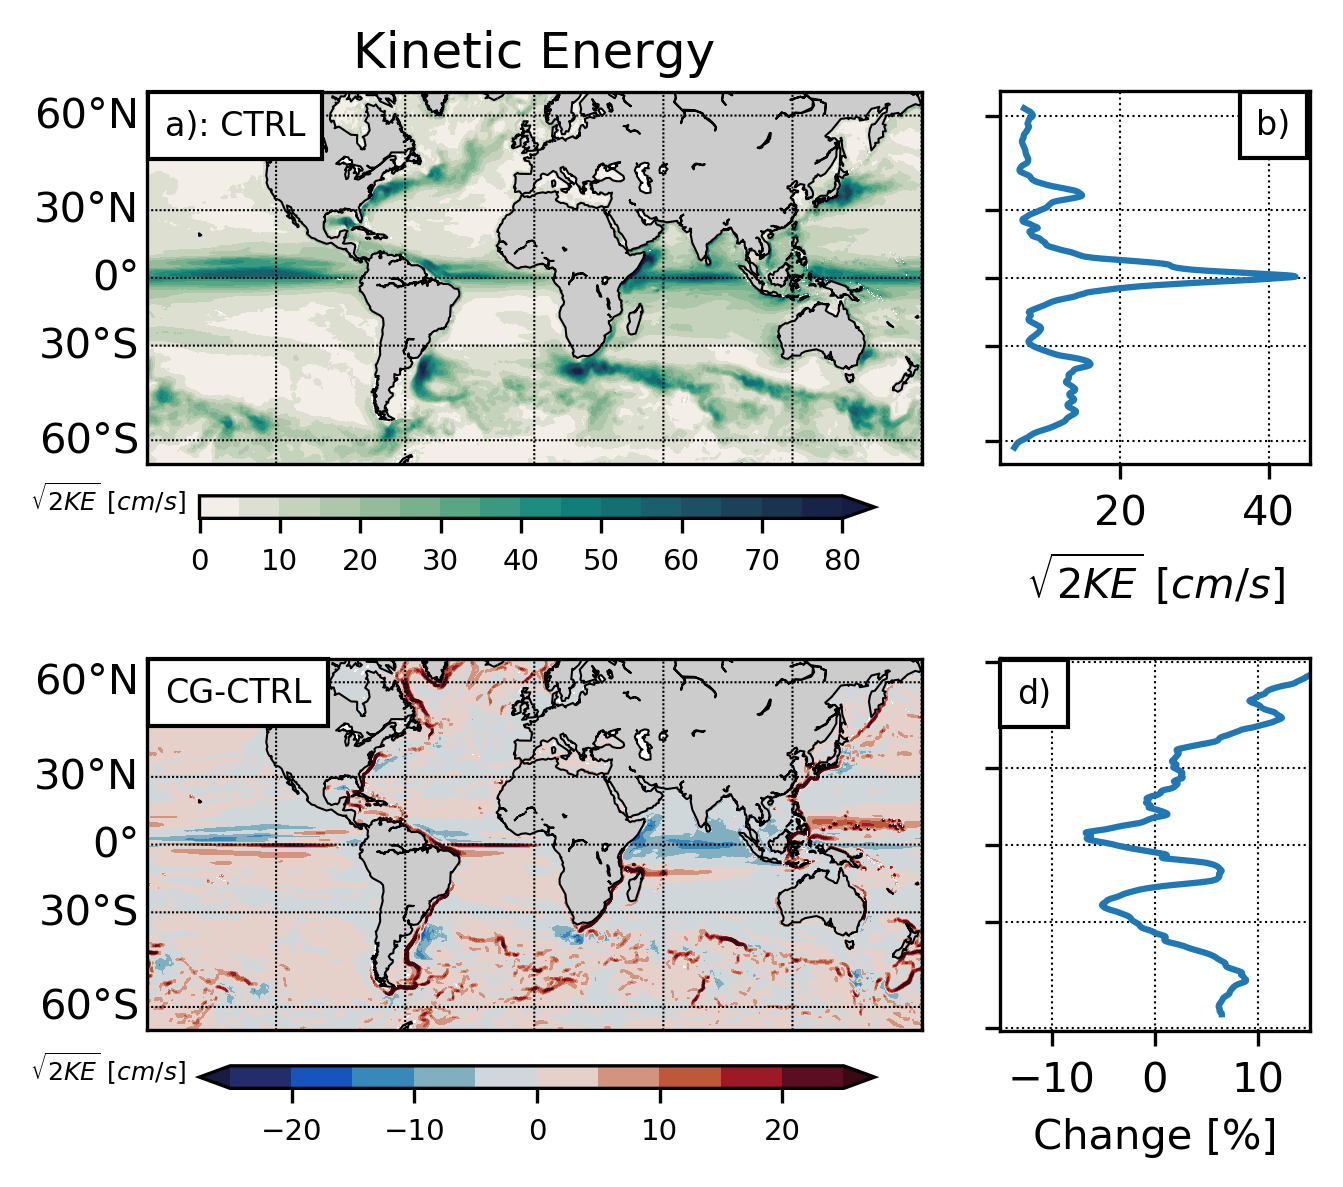

In [25]:
m = Basemap(projection='merc',llcrnrlat=-65,urcrnrlat=65,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
fig = plt.figure(figsize=(5, 5), dpi=300)
gs = gridspec.GridSpec(200, 150)

#a
ax1 = plt.subplot(gs[0:90, 0:100])
levs = np.arange(0,85,5)

#data=neg_sqrt(2*(CTRL_eke_100m_tmean+CTRL_mke_100m_tmean))
data=np.sqrt(2*(CTRL_eke_100m_tmean+CTRL_mke_100m_tmean))

#data=CTRL_eke_100m_tmean+CTRL_mke_100m_tmean

plt.title('Kinetic Energy')

cs=plot_func(data,levs,cm.tempo,'max')
cbaxes = fig.add_axes([0.160, 0.55, 0.45, 0.015])

cb = plt.colorbar(cs,cax = cbaxes,orientation="horizontal")
cb.ax.tick_params(labelsize=7)
cb.ax.set_ylabel(r'$\sqrt{2 KE}$ $[cm/s]$',fontsize=6,rotation=0,y=+0.10,labelpad=+22)
#b
ax2 = plt.subplot(gs[12:78, 110:150])
N=4
y1=99
y2=621
x,y=m(lon[y1:y2,:],lat[y1:y2,:]) # 65S - 65N
plt.plot(running_mean_1d(np.nanmean(data[y1:y2,:],1),N),y[:,720])
plt.yticks(y[[8,130,260,390,512],720].tolist())
plt.grid(color='k', ls='dotted', linewidth=0.5)

plt.grid(color='k', ls='dotted', linewidth=0.5)
plt.xlabel(r'$\sqrt{2 KE}$ $[cm/s]$')
ax2.axes.yaxis.set_ticklabels([])

#c
ax3 = plt.subplot(gs[100:190, 0:100])
levs=np.arange(-25,30,5)

data=np.sqrt(2*(CG_eke_100m_tmean+CG_mke_100m_tmean))-np.sqrt(2*(CTRL_eke_100m_tmean+CTRL_mke_100m_tmean))
# data=np.sqrt(2*(CG_mke_100m_tmean))-np.sqrt(2*(CTRL_mke_100m_tmean))

# levs=np.arange(-1000,1100,100)
# data=CG_eke_100m_tmean+CG_mke_100m_tmean-(CTRL_eke_100m_tmean+CTRL_mke_100m_tmean)

# data=np.sqrt(2*(np.nanmean(CG_eke[:,0,:,:]+CG_mke[:,0,:,:],0)))-np.sqrt(2*(np.nanmean(CTRL_eke[:,0,:,:]+CTRL_mke[:,0,:,:],0)))

cs=plot_func(data,levs,cm.balance,'both')
# x1=-78; x2 =-25; y1=35;y2=45
# m.plot([x1,x1,x2,x2,x1],[y2,y1,y1,y2,y2],'-r',latlon=True,linewidth=0.7)
# x1=128; x2 =172; y1=30;y2=45
# m.plot([x1,x1,x2,x2,x1],[y2,y1,y1,y2,y2],'-r',latlon=True,linewidth=0.7)
# x1=-180; x2 =180; y1=-64.5;y2=-30
# m.plot([x1,x2],[y1,y1],'-r',latlon=True,linewidth=0.7)
# m.plot([x1,x2],[y2,y2],'-r',latlon=True,linewidth=0.7)

cbaxes = fig.add_axes([0.160, 0.17, 0.45, 0.015])

cb = plt.colorbar(cs,cax = cbaxes,orientation="horizontal")
cb.ax.tick_params(labelsize=7)
cb.ax.set_ylabel(r'$\sqrt{2 KE}$ $[cm/s]$',fontsize=6,rotation=0,y=+0.10,labelpad=+22)
#d
ax4 = plt.subplot(gs[112:178, 110:150])
data=np.nanmean(np.sqrt(2*(CG_eke_100m_tmean+CG_mke_100m_tmean))-np.sqrt(2*(CTRL_eke_100m_tmean+CTRL_mke_100m_tmean)),1)/\
     np.nanmean(np.sqrt(2*(CTRL_eke_100m_tmean+CTRL_mke_100m_tmean)),1)*100
#data=np.nanmean((CG_eke_100m_tmean+CG_mke_100m_tmean)-(CTRL_eke_100m_tmean+CTRL_mke_100m_tmean),1)\
#    /np.nanmean((CTRL_eke_100m_tmean+CTRL_mke_100m_tmean),1) *100

# data=np.nanmean(((CG_eke+CG_mke)-(CTRL_eke+CTRL_mke))/(CTRL_eke+CTRL_mke),0) *100
N=40
y1=99
y2=621
x,y=m(lon[y1:y2,:],lat[y1:y2,:]) # 65S - 65N
plt.plot(running_mean_1d(data[y1:y2],N),y[:,720])
plt.yticks(y[[8,130,260,390,512],720].tolist())
plt.grid(color='k', ls='dotted', linewidth=0.5)
plt.xlabel(r'Change [%]')
plt.xlim(0,35)
plt.xlim(-15,15)

ax4.axes.yaxis.set_ticklabels([])

i=0.023
j=0.910
plt.text(i,j,'a): CTRL',    ha='left',va='center',transform=ax1.transAxes,bbox={'facecolor':'white'},fontsize=8)
plt.text(i+.805,j,'b)',    ha='left',va='center',transform=ax2.transAxes,bbox={'facecolor':'white'},fontsize=8)
plt.text(i,j,'CG-CTRL',ha='left',va='center',transform=ax3.transAxes,bbox={'facecolor':'white'},fontsize=8)
plt.text(i+.03,j-.005,'d)',ha='left',va='center',transform=ax4.transAxes,bbox={'facecolor':'white'},fontsize=8)

# plt.text(0.209, 0.765,'GSE',ha='left',va='center',\
#          transform=ax3.transAxes,bbox=dict(facecolor='white',edgecolor='red',pad=1),fontsize=6)
# plt.text(0.805, 0.750,'KE',ha='left',va='center',\
#          transform=ax3.transAxes,bbox=dict(facecolor='white',edgecolor='red',pad=1),fontsize=6)
# plt.text(0.250, 0.365,'SO',ha='left',va='center',\
#          transform=ax3.transAxes,bbox=dict(facecolor='white',edgecolor='red',pad=1),fontsize=6)

plt.savefig('fig2_KE.png',dpi=300, transparent=True)

# box means

In [22]:
# box mean
# first 10 levels NOPE, only surface
def box_mean(var1,var2,i1,i2,j1,j2):
    grid_part = grid[0:10,j1:j2,i1:i2]
    diff      = np.nansum(np.nansum(np.nansum((var2-var1)[:,:,j1:j2,i1:i2] * grid_part,1),1),1)/np.nansum(grid_part)
    diff_perc = diff / (np.nansum(np.nansum(np.nansum((var1[:,:,j1:j2,i1:i2]) * grid_part,1),1),1)\
                        /np.nansum(grid_part)) *100 # in %
    return diff, diff_perc

In [23]:
grid      = (e1t * e2t * e3t *ORCA025_ocean)

In [45]:
print KE_diff_percent.mean(), '+-', KE_diff_percent.std()
print KE_mke_diff_percent.mean(), '+-', KE_mke_diff_percent.std()
print KE_eke_diff_percent.mean(), '+-', KE_eke_diff_percent.std()

9.35569539554 +- 4.51718089399
7.56387002194 +- 10.9650952598
11.5278749902 +- 9.72637867989


45.1069 35.1961
-24.9422 -77.5989
9.2527526798 +- 5.32145646195
8.4819942223 +- 13.4914132408
10.8235302061 +- 11.7750887892


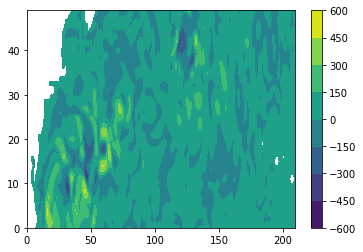

In [116]:
# GSE box
i1=840
i2=1050
j1=650
j2=700
print nav_lat[j1:j2,i1:i2].max(), nav_lat[j1:j2,i1:i2].min()
print nav_lon[j1:j2,i1:i2].max(), nav_lon[j1:j2,i1:i2].min() 
plt.contourf(ORCA025_CG_eke[0,0,j1:j2,i1:i2]-ORCA025_CTRL_eke[0,0,j1:j2,i1:i2])
plt.colorbar()

KE_diff, KE_diff_percent = box_mean(ORCA025_CTRL_eke+ORCA025_CTRL_mke,ORCA025_CG_eke+ORCA025_CG_mke,i1,i2,j1,j2)
KE_eke_diff, KE_eke_diff_percent = box_mean(ORCA025_CTRL_eke,ORCA025_CG_eke,i1,i2,j1,j2)
KE_mke_diff, KE_mke_diff_percent = box_mean(ORCA025_CTRL_mke,ORCA025_CG_mke,i1,i2,j1,j2)

print KE_diff_percent.mean(), '+-', KE_diff_percent.std()
print KE_mke_diff_percent.mean(), '+-', KE_mke_diff_percent.std()
print KE_eke_diff_percent.mean(), '+-', KE_eke_diff_percent.std()

45.1056 29.0715
172.499 128.379
7.95623496152 +- 4.78552094013
4.50847091475 +- 10.6475710332
13.234909623 +- 13.2439787935


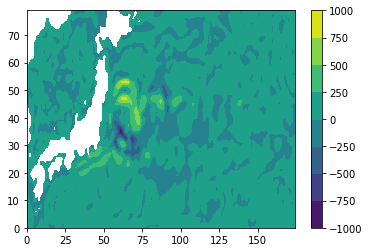

In [119]:
# KE box
i1=225
i2=400
j1=620
j2=700
print nav_lat[j1:j2,i1:i2].max(), nav_lat[j1:j2,i1:i2].min()
print nav_lon[j1:j2,i1:i2].max(), nav_lon[j1:j2,i1:i2].min() 
plt.contourf(ORCA025_CG_eke[0,0,j1:j2,i1:i2]-ORCA025_CTRL_eke[0,0,j1:j2,i1:i2])
plt.colorbar()

KE_diff, KE_diff_percent = box_mean(ORCA025_CTRL_eke+ORCA025_CTRL_mke,ORCA025_CG_eke+ORCA025_CG_mke,i1,i2,j1,j2)
KE_eke_diff, KE_eke_diff_percent = box_mean(ORCA025_CTRL_eke,ORCA025_CG_eke,i1,i2,j1,j2)
KE_mke_diff, KE_mke_diff_percent = box_mean(ORCA025_CTRL_mke,ORCA025_CG_mke,i1,i2,j1,j2)
print KE_diff_percent.mean(), '+-', KE_diff_percent.std()
print KE_mke_diff_percent.mean(), '+-', KE_mke_diff_percent.std()
print KE_eke_diff_percent.mean(), '+-', KE_eke_diff_percent.std()

-30.0234 -65.2886
180.0 -179.75
5.51507969611 +- 2.58332588584
3.04341612753 +- 2.32760829634
8.24287916718 +- 5.30351613237


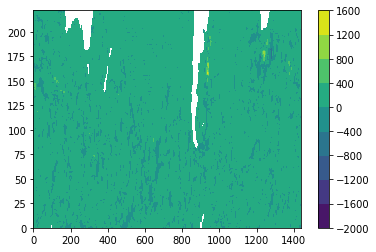

In [120]:
# SO
i1=0
i2=1441
j1=150
j2=373
print nav_lat[j1:j2,i1:i2].max(), nav_lat[j1:j2,i1:i2].min()
print nav_lon[j1:j2,i1:i2].max(), nav_lon[j1:j2,i1:i2].min() 

plt.contourf(ORCA025_CG_eke[0,0,j1:j2,i1:i2]-ORCA025_CTRL_eke[0,0,j1:j2,i1:i2])
plt.colorbar()

KE_diff, KE_diff_percent = box_mean(ORCA025_CTRL_eke+ORCA025_CTRL_mke,ORCA025_CG_eke+ORCA025_CG_mke,i1,i2,j1,j2)
KE_eke_diff, KE_eke_diff_percent = box_mean(ORCA025_CTRL_eke,ORCA025_CG_eke,i1,i2,j1,j2)
KE_mke_diff, KE_mke_diff_percent = box_mean(ORCA025_CTRL_mke,ORCA025_CG_mke,i1,i2,j1,j2)
print KE_diff_percent.mean(), '+-', KE_diff_percent.std()
print KE_mke_diff_percent.mean(), '+-', KE_mke_diff_percent.std()
print KE_eke_diff_percent.mean(), '+-', KE_eke_diff_percent.std()

89.9479 -77.0105
180.0 -180.0
4.49468971717 +- 0.718925536471
2.55397238051 +- 0.959723171782
6.41557013587 +- 1.39161062255


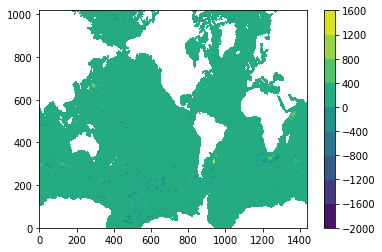

In [25]:
# Global
i1=0
i2=1441
j1=0
j2=1020
print nav_lat[j1:j2,i1:i2].max(), nav_lat[j1:j2,i1:i2].min()
print nav_lon[j1:j2,i1:i2].max(), nav_lon[j1:j2,i1:i2].min() 

plt.contourf(ORCA025_CG_eke[0,0,j1:j2,i1:i2]-ORCA025_CTRL_eke[0,0,j1:j2,i1:i2])
plt.colorbar()

KE_diff, KE_diff_percent = box_mean(ORCA025_CTRL_eke+ORCA025_CTRL_mke,ORCA025_CG_eke+ORCA025_CG_mke,i1,i2,j1,j2)
KE_eke_diff, KE_eke_diff_percent = box_mean(ORCA025_CTRL_eke,ORCA025_CG_eke,i1,i2,j1,j2)
KE_mke_diff, KE_mke_diff_percent = box_mean(ORCA025_CTRL_mke,ORCA025_CG_mke,i1,i2,j1,j2)
print KE_diff_percent.mean(), '+-', KE_diff_percent.std()
print KE_mke_diff_percent.mean(), '+-', KE_mke_diff_percent.std()
print KE_eke_diff_percent.mean(), '+-', KE_eke_diff_percent.std()

In [26]:
!conda list

# packages in environment at /gpfs/fs6/home-geomar/smomw122/TM/software/miniconda3_20180110/envs/py2_std:
#
alabaster                 0.7.10                   py27_1    conda-forge
anaconda-client           1.6.5                      py_0    conda-forge
aospy                     0.2                      py27_0    conda-forge
asn1crypto                0.22.0                   py27_0    conda-forge
astroid                   1.5.3                    py27_0    conda-forge
babel                     2.5.1                    py27_0    conda-forge
backports                 1.0                      py27_1    conda-forge
backports.functools_lru_cache 1.4                      py27_1    conda-forge
backports.shutil_get_terminal_size 1.0.0                      py_3    conda-forge
backports_abc             0.5                      py27_0    conda-forge
basemap                   1.1.0                    py27_3    conda-forge
basemap-data-hires        1.1.0                         0    conda-forge
big